In [1]:
import numpy as np                      
import pandas as pd                     
import os                               
import cv2      
import tensorflow
import matplotlib.pyplot as plt         
from tqdm.notebook import tqdm          
from sklearn.utils import shuffle       

from tensorflow.keras.models import load_model
from tensorflow.keras import applications           
from tensorflow.keras import optimizers            
from tensorflow.keras.utils import to_categorical   
from tensorflow.keras.models import Sequential, Model, load_model 
from tensorflow.keras.layers import Dropout, Flatten, Dense 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
foldernames = os.listdir('./training-data')
categories = []
files = []
i = 0
for k, folder in enumerate(foldernames):
    filenames = os.listdir("./training-data/" + folder);
    for file in filenames:
        files.append("./training-data/" + folder + "/" + file)
        categories.append(k)
        
df = pd.DataFrame({
    'filename': files,
    'category': categories
})
train_df = pd.DataFrame(columns=['filename', 'category'])
for i in range(10):
    train_df = train_df.append(df[df.category == i].iloc[:500,:])

train_df.head()
train_df = train_df.reset_index(drop=True)
train_df

,filename,category
0,./training-data/spider/OIP-4Xc2xJTCLn4FSQmQ08M...,0
1,./training-data/spider/OIP-726qaS3uHC3IGduUTTV...,0
2,./training-data/spider/OIP-04fhoeLUsHSQ7MackFT...,0
3,./training-data/spider/OIP-FXgDq6uJO8Bt5wP11db...,0
4,./training-data/spider/OIP-2YRyN4GnEn_8Efun_3z...,0
...,...,...
4995,./training-data/horse/OIP-oap9gpcs2975WMby8jvL...,9
4996,./training-data/horse/OIP-LaMTHLyJxpIBseRgD_ne...,9
4997,./training-data/horse/OIP-jdO7QaRkH8dUnVXGC3Dt...,9
4998,./training-data/horse/OIP-3bZ04VOtOB0Wr_XGJsG7...,9


In [3]:
y = train_df['category']
x = train_df['filename']
y = train_df['category']

x, y = shuffle(x, y, random_state=8) 

In [4]:
def centering_image(img):
    size = [256,256]
    
    img_size = img.shape[:2]
    
    row = (size[1] - img_size[0]) // 2
    col = (size[0] - img_size[1]) // 2
    resized = np.zeros(list(size) + [img.shape[2]], dtype=np.uint8)
    resized[row:(row + img.shape[0]), col:(col + img.shape[1])] = img

    return resized

images = []
with tqdm(total=len(train_df)) as pbar:
    for i, file_path in enumerate(train_df.filename.values):
        img = cv2.imread(file_path)
        print(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if(img.shape[0] > img.shape[1]):
            tile_size = (int(img.shape[1]*256/img.shape[0]),256)
        else:
            tile_size = (256, int(img.shape[0]*256/img.shape[1]))

        img = centering_image(cv2.resize(img, dsize=tile_size))

        img = img[16:240, 16:240]
        images.append(img)
        pbar.update(1)

images = np.array(images)

./training-data/spider/OIP-4Xc2xJTCLn4FSQmQ08M7NAHaFa.jpeg
./training-data/spider/OIP-726qaS3uHC3IGduUTTVy_QHaFj.jpeg
./training-data/spider/OIP-04fhoeLUsHSQ7MackFTF_AHaHa.jpeg
./training-data/spider/OIP-FXgDq6uJO8Bt5wP11db47gHaFD.jpeg
./training-data/spider/OIP-2YRyN4GnEn_8Efun_3zfygHaHa.jpeg
./training-data/spider/OIP-NKJXhMo0G_pLhekfFVzX3QHaEn.jpeg
./training-data/spider/OIP-W_7-EaeajgofC-7oOwhSnwEMEs.jpeg
./training-data/spider/OIP-aI0GVerH2CONbgLEn_c1RQHaFS.jpeg
./training-data/spider/OIP-XqA4D3bfoeGFjG54UBsCMwHaEK.jpeg
./training-data/spider/OIP-fDtauUI9EoRxoR3xuAfw0AHaGP.jpeg
./training-data/spider/OIP-u7-KgvBFflFZvXSbmtGtsAEMDo.jpeg
./training-data/spider/OIP-DX4dztiGvYIbEeknoXlt_gHaHa.jpeg
./training-data/spider/OIP-bT5FOljgLy6vbTSZ5j38_QHaFj.jpeg
./training-data/spider/OIP-_no9YX5VYCocYJjQvShDbAHaGH.jpeg
./training-data/spider/OIP-f8rJQtxoP5RdG-dsrknuVgHaF9.jpeg
./training-data/spider/OIP-96TZ-FTXb8_40RuYTYhmkAHaFt.jpeg
./training-data/spider/OIP-Xrd-4i5V0C_tUUfyTzcLDgHaE8.jp

./training-data/spider/OIP-Ldswi8Knbdq1d4mQnrMMQwHaJ4.jpeg
./training-data/spider/OIP-R9x3DBd-vP4SWY3j5w4VKwHaFi.jpeg
./training-data/spider/OIP-ntg8OWORsLbBSNogVEcQuQHaEU.jpeg
./training-data/spider/OIP-dPJWp54pP_xnZEE6Is6KeAAAAA.jpeg
./training-data/spider/OIP-pjfGQbCUCFnabjlBwQRqWQHaG9.jpeg
./training-data/spider/OIP-KYKiaLzEf4L0F__KCqyolQHaFx.jpeg
./training-data/spider/ea35b6062df4023ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg
./training-data/spider/OIP-pTOXFR6E2Qz1bZ2K6SjSSAHaEw.jpeg
./training-data/spider/OIP-AEVjLhrX4lNRKpAqwe4MqgHaE8.jpeg
./training-data/spider/OIP-f-g-cdwHYtTvwH0e2T4juwHaFT.jpeg
./training-data/spider/OIP-n3ZzLhLS69CUiKTJbyo4KwHaFL.jpeg
./training-data/spider/OIP-Ltusa5qO1sfV4YaiIUNKoAHaJ5.jpeg
./training-data/spider/OIP-kRCPlW-r08GZG00I7wXd4gHaE9.jpeg
./training-data/spider/OIP-5pzMcc5IHZmimbR0hhkELgAAAA.jpeg
./training-data/spider/OIP-CU5Yqh9fM7uNKmrw8_PHIAHaGR.jpeg
./training-data/spider/OIP-aBm03qZfDCr1eU3XxmKdtQHaGn.jpeg
./training-data/spi

./training-data/spider/OIP-gNKBhIsl1h2WFJG0UkulBgHaFT.jpeg
./training-data/spider/OIP-__0iRbh2nZ5IBz0_36hn3wHaGM.jpeg
./training-data/spider/OIP-A3hQ5aqaY6ujxWvY4U4gYQHaE7.jpeg
./training-data/spider/OIP-IQy2XDibOiY1CyIjPSkflgHaE5.jpeg
./training-data/spider/OIP-z5rafOWOJ-NhLLKPzKnMiwHaFe.jpeg
./training-data/spider/OIP-QGyeICsYYeiqMcdXDL3vtAHaE7.jpeg
./training-data/spider/OIP-R6CcakuTMeS6S8gicSK3ggHaLG.jpeg
./training-data/spider/OIP-cec5EyDmAeXcCvB60nvVqgHaE7.jpeg
./training-data/spider/OIP-HBFLziPp1iGMOy4LLKjybAHaFU.jpeg
./training-data/spider/OIP-5hFyrKn5mTFZfbPCa1cnNAHaEL.jpeg
./training-data/spider/OIP-kMd7qLlNI1LCa55GEqGSBAHaE7.jpeg
./training-data/spider/OIP-4wDASYhAQHuT1iy2-5I6YgHaKo.jpeg
./training-data/spider/OIP-zHdTca7OlHCbkikqeKXz9wHaFj.jpeg
./training-data/spider/OIP-ueJmA5yt3NnwKYJoiXW-NAHaHP.jpeg
./training-data/spider/OIP-xIFJvxXdNGYLrh0lWsIusgAAAA.jpeg
./training-data/spider/OIP-VSzTAiASrq9nl6xD7Zd9XwHaHa.jpeg
./training-data/spider/OIP-qJ3to1_xCzEx4NO5lzoJwgHaE6.jp

./training-data/cow/OIP-BsdDCh_yup0dHbP8zk-EXgHaE7.jpeg
./training-data/cow/OIP-Wu_4fQ30ezKIJMuFs6KuvAHaEM.jpeg
./training-data/cow/OIP-G1KuBaGVWOrX5rL6pzpJqwHaFk.jpeg
./training-data/cow/OIP-fzfHjaZPeT66Sj0-EYDDFwHaFj.jpeg
./training-data/cow/OIP-ZDgK7ytrgrX2FtKqYMyspAHaFN.jpeg
./training-data/cow/OIP-7NFGONcF8Stw8FlQ1tICiwHaKe.jpeg
./training-data/cow/OIP-gtZ_HvFuWyTB9orXq8kirgAAAA.jpeg
./training-data/cow/OIP-k0dIl_KY08VZzi6xG9JcKgHaE8.jpeg
./training-data/cow/OIP-_01xh7qI0nvypZLkOxGyIgHaFi.jpeg
./training-data/cow/OIP-EyPnilcEumNa-GspUjw8RAHaDp.jpeg
./training-data/cow/OIP-r2cOlYqMl0hUjqENb8XMBgHaFK.jpeg
./training-data/cow/OIP-vNwk_dMFanrMM6MOBKw1kQHaFS.jpeg
./training-data/cow/OIP-2h83tEtPUJS2PiCLCR6-aAHaFO.jpeg
./training-data/cow/OIP-jFH6wZH5Wyq1gia8pv4fEQHaFL.jpeg
./training-data/cow/OIP-EjcZRKp-LgfeBtneTbqWlAHaDm.jpeg
./training-data/cow/OIP-_2UQ4ixe4HMHonmuAP3vFAHaEk.jpeg
./training-data/cow/OIP-SvNOAhbiWqiT0vpmxdV_zAHaFV.jpeg
./training-data/cow/OIP-KfqqwgBFphD9AXMrkdn7WgHa

./training-data/cow/OIP-CFbGxDjWA7OQ7zxx5WnjOgHaKD.jpeg
./training-data/cow/OIP-3wKb-xBOBNGr0LwTqC1XuAHaE6.jpeg
./training-data/cow/OIP-0kTmmoIaGiwYL1FDYbL_hgHaFQ.jpeg
./training-data/cow/OIP---lAIbDlHKmejDpqrXq6vAAAAA.jpeg
./training-data/cow/OIP-AhGPXMfjC9W-Z_GlJj4gFAHaGp.jpeg
./training-data/cow/OIP-MALNGhY7UcPxJoquxLQWlQHaF7.jpeg
./training-data/cow/OIP-nAv3WAtQOSAql83z7H8YiAHaFj.jpeg
./training-data/cow/OIP-_YhteqH1eojqiNVzyYf9SAHaFG.jpeg
./training-data/cow/OIP-v6kcwktDiCaEXoqbjBx4qQHaC8.jpeg
./training-data/cow/OIP-ohA3CWiD50_xxseojpj7QQHaFO.jpeg
./training-data/cow/OIP-kAcBKnzftcEIJ7U_QxTL-AHaE7.jpeg
./training-data/cow/OIP-5qDH62SJZANMTuj3ZDvpGwHaFb.jpeg
./training-data/cow/OIP-xbpTROO0gYplf5VD00esCgHaE1.jpeg
./training-data/dog/OIP-u3j2hWXL7Vj5ft8nzsdp7gHaFj.jpeg
./training-data/dog/OIP-4hL_G2d5j_oGLWJ-wxlRxAHaLJ.jpeg
./training-data/dog/OIP-OVxXkoFSlMOq5u3iAxhIlwHaE7.jpeg
./training-data/dog/OIP-L0zqa21CS3rrg_xwkhSQWQHaFj.jpeg
./training-data/dog/OIP-VG62Ak_GHs3mgdLacsY_HgHa

./training-data/dog/OIP-nRILQ3Rq0jw7sj3GXR8P0QHaGY.jpeg
./training-data/dog/OIP-mbFV2HD5QAYTQZcthqTQ6wHaLE.jpeg
./training-data/dog/OIP-ptlU8sUJGEZOKfzWVPBPXQHaHa.jpeg
./training-data/dog/OIP-V9bLWun5In27vV7N9XZv3wHaEl.jpeg
./training-data/dog/OIP-4rPAIFx0zpiMrovgDrmqLgHaF6.jpeg
./training-data/dog/OIP-7CeBoEPclKzQkvbLA2kHGAHaIg.jpeg
./training-data/dog/OIP-8bLZqkUbysSKYvc44lgmnQHaFj.jpeg
./training-data/dog/OIP-mF80iFpNY5pHBO7uCt9gugHaJN.jpeg
./training-data/dog/OIP-mlvhU70TJYnM-foPMwSlTgHaFn.jpeg
./training-data/dog/OIP-EuAdaMexob7RwLTlSNQg6gHaFS.jpeg
./training-data/dog/OIP-5FZDmq050jjAL3mYkLEKGQHaFm.jpeg
./training-data/dog/OIP-FBDHnKp8a5iFYN1mwC5xaQHaK9.jpeg
./training-data/dog/OIP-ZFuSOEL2yPGuCdTMpAjdRwHaJ4.jpeg
./training-data/dog/OIP-VINE07Ju_jqqCCPhjqLwFAHaF2.jpeg
./training-data/dog/OIP-0cwqK_pId75Pu0YLQq7HwgHaKj.jpeg
./training-data/dog/OIP-GygfnG9Y5XccP4d209UVigHaHa.jpeg
./training-data/dog/OIP-lQdYiSfmyryNSxJ0gIqEXAHaJO.jpeg
./training-data/dog/OIP-SP_zE4Z3vcLrh46qKqF0jQHa

./training-data/dog/OIP-Az0Xfzhn5gaRwzgifo-rIgHaE7.jpeg
./training-data/dog/OIP-STdlsbIaFXV76VMru1_NpAHaHa.jpeg
./training-data/dog/OIP-QNBEWbbE0tE-gS-Na5g7IgHaC_.jpeg
./training-data/dog/OIP-GevR1iMW9EzyIOnwZVHEIwHaFj.jpeg
./training-data/dog/OIP-oD1EP99FvKkUj_9ijDbHZQHaEK.jpeg
./training-data/dog/OIP-XnHARS5OlQmpGLH8LEsnJgHaFY.jpeg
./training-data/dog/OIP-LB4grxW5dTsSEfrgKDl96wAAAA.jpeg
./training-data/dog/OIP-hycA6E5_KxeNqITxY0OptQHaE-.jpeg
./training-data/dog/OIP-h-a0t5rgxNEim3XNwGEvbAHaFj.jpeg
./training-data/dog/OIP-IqOxs22GYwgpxajdG76u7QEsDh.jpeg
./training-data/dog/OIP-biPVE-tklBDe-hfK8dAwfQHaFj.jpeg
./training-data/dog/OIP-e21rYt0bC28LMa0VqZbz1gHaFQ.jpeg
./training-data/dog/OIP-C_0Z6sEK8Jzo2bhW7wbmvAHaEK.jpeg
./training-data/dog/OIP-8aLnXf5oYBGtj09eGZQSDgHaFh.jpeg
./training-data/dog/OIP-8ZEp1RfexOCm3seatuFivAHaE-.jpeg
./training-data/dog/OIP--Vd4TYq5XdX4Flb0D3yBNAHaGg.jpeg
./training-data/dog/OIP-shkLtBnE1lavf4EixajJSAHaF7.jpeg
./training-data/dog/OIP-qKOkjAdlBeeu4dliynFNBQHa

./training-data/butterfly/OIP-Bs5ATHAnhM42ZYHJTgy79QHaNJ.jpeg
./training-data/butterfly/OIP-6cpoMjN1R_lgziI9Lnz1UwHaEn.jpeg
./training-data/butterfly/OIP-5gR8sU3QPiFVxumVo_--twHaFp.jpeg
./training-data/butterfly/OIP-uT3uhr8UQpjw1RTMnpE3BQAAAA.jpeg
./training-data/butterfly/OIP-QChmuXSt6KoZ3j5kPdDpogHaEK.jpeg
./training-data/butterfly/OIP-BZwUTAz39WQdWBOzKxSfQAHaFj.jpeg
./training-data/butterfly/ea36b7072ff0003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/OIP-jkbGnEEDmW39e1lBTJ8ttgHaDy.jpeg
./training-data/butterfly/OIP-eJC9RLSm4FyHYaDEf_TBawHaIy.jpeg
./training-data/butterfly/OIP-2VIs39I2nkFQ_kD7JzlwAQHaE8.jpeg
./training-data/butterfly/OIP-aoBpHaDsBzu3pJs4k0j2QAHaFj.jpeg
./training-data/butterfly/OIP-7tyAtXBL3NwwJ6TcLAeSqwHaE8.jpeg
./training-data/butterfly/OIP-UaxarEcVgSn5rBapFJi4zQHaGf.jpeg
./training-data/butterfly/OIP-0wlV2OUzauS5VTWx2x3UIAHaFj.jpeg
./training-data/butterfly/OIP-OMBIiuBwdW3RJuzUq10PAAHaGS.jpeg
./training-data/butterfly/OIP-ZTb

./training-data/butterfly/OIP-EMGZRBlz8vIQrpfpm6gDrQHaEK.jpeg
./training-data/butterfly/OIP-P_zZnvdPExdete9NbUHPSwHaG9.jpeg
./training-data/butterfly/OIP-IyajAknJhWGAfVEQaXIOZgHaE6.jpeg
./training-data/butterfly/OIP-XmYckcSuyg7NBJdpLLOV0gHaLH.jpeg
./training-data/butterfly/OIP-7TTdpmZCR0R9YokwVO77XQHaFq.jpeg
./training-data/butterfly/OIP-9OOaHYC8hBDwiIVpNXDEBgHaG3.jpeg
./training-data/butterfly/OIP-_OMsWl14sQsMYLGODxZ6kAHaHa.jpeg
./training-data/butterfly/OIP-j_tLMflPJFtpgQO7X_7S8QHaFZ.jpeg
./training-data/butterfly/OIP-OSdzPT_VPpAevRS1KZ1mDQHaHa.jpeg
./training-data/butterfly/OIP-r7dDc3MwNpvYURlcmAGENgHaHa.jpeg
./training-data/butterfly/eb31b50d2af0053ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/OIP-nlGilYQmBES8kHCike8xvAHaFj.jpeg
./training-data/butterfly/OIP-88Mz7VvdbkVQ5mNcPnja3QHaIu.jpeg
./training-data/butterfly/OIP-6Eb4Y-wDtvvEWwMab72a0gHaFd.jpeg
./training-data/butterfly/ea37b20c20f5053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.

./training-data/butterfly/ea34b90e20f7003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/OIP-padTzHGqx_RpKoC5z0m0VwHaFJ.jpeg
./training-data/butterfly/OIP-05XApkSfFPeJvmujAIqQxQHaFj.jpeg
./training-data/butterfly/ea36b90c2cf3053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/OIP-JQidmdrybKE_dMlvWTYFQQHaFY.jpeg
./training-data/butterfly/OIP-P7l6MHcT4fg3Wv7bmkXy6AHaGJ.jpeg
./training-data/butterfly/OIP-isrsKyqp4J6B0eiN3gmQPwHaEo.jpeg
./training-data/butterfly/e832b70c2af0043ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/ea37b10e21fd003ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
./training-data/butterfly/OIP-aduF9xe12paXmuMUfAVR1wHaGL.jpeg
./training-data/butterfly/OIP-amRFqW3XaBAwWUCBH0AtJgAAAA.jpeg
./training-data/butterfly/ea37b80d2cf4073ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg
./training-data/butterfly/OIP-wqPZ_MXr8yj9Yw-4aOtRawHaIT.jpeg
./trainin

./training-data/cat/mikhail-vasilyev-130018-unsplash.jpg
./training-data/cat/673.jpeg
./training-data/cat/685.jpeg
./training-data/cat/eb35b4082df31c22d2524518b7444f92e37fe5d404b0144390f8c079a4e5b6_640.jpg
./training-data/cat/280.jpeg
./training-data/cat/1754.jpeg
./training-data/cat/100.jpeg
./training-data/cat/281.jpeg
./training-data/cat/287.jpeg
./training-data/cat/eb3cb50a2cf6033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
./training-data/cat/1039.jpeg
./training-data/cat/984.jpeg
./training-data/cat/597.jpeg
./training-data/cat/1728.jpeg
./training-data/cat/303.jpeg
./training-data/cat/129.jpeg
./training-data/cat/916.jpeg
./training-data/cat/ea36b70b21fc023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
./training-data/cat/414.jpeg
./training-data/cat/ea37b6072df1023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
./training-data/cat/1197.jpeg
./training-data/cat/119.jpeg
./training-data/cat/684.jpeg
./training-data/cat/798.jpeg
./training-data/ca

./training-data/cat/jonas-vincent-2717-unsplash.jpg
./training-data/cat/eb30b2092ef2033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg
./training-data/cat/1467.jpeg
./training-data/cat/1247.jpeg
./training-data/cat/764.jpeg
./training-data/cat/494.jpeg
./training-data/cat/594.jpeg
./training-data/cat/648.jpeg
./training-data/cat/1222.jpeg
./training-data/cat/1840.jpeg
./training-data/cat/1821.jpeg
./training-data/cat/1854.jpeg
./training-data/cat/40.jpeg
./training-data/cat/e83cb50f2cfc063ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg
./training-data/cat/1837.jpeg
./training-data/cat/206.jpeg
./training-data/cat/1432.jpeg
./training-data/cat/ea34b40c21f2033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
./training-data/cat/1313.jpeg
./training-data/cat/634.jpeg
./training-data/cat/370.jpeg
./training-data/cat/ea37b40d2cf7053ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg
./training-data/cat/774.jpeg
./training-data/cat/ea37b0092ef4023ed1584d05fb

./training-data/elephant/eb32b40c2af6023ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/OIP-xDNMDfAdG7DSnHcxPbB9WAHaGg.jpeg
./training-data/elephant/OIP-iXjiteXHZusKWY7yjgBYiAHaEK.jpeg
./training-data/elephant/OIP-_bKqe1CQ0GOiOJUER3GWbgAAAA.jpeg
./training-data/elephant/OIP-yNDf-ruD3aWAA14mJWpB1AHaEK.jpeg
./training-data/elephant/OIP-FrJF-hoKI5izIMyCDcMPcwHaE7.jpeg
./training-data/elephant/e833b80c2afc033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/eb35b00e2bfd003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/e83cb10f2bf7033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/OIP-wNFVMamXuzTG7X_rv12qzAHaE7.jpeg
./training-data/elephant/OIP-M8adQ1iP1y9c-cdKz-KeqAHaFW.jpeg
./training-data/elephant/OIP-IPGLIq2oR5hMK7O8EOx1qQHaE7.jpeg
./training-data/elephant/OIP-7EIVbflWulEso5ASPEUbtQAAAA.jpeg
./training-data/elephant/OIP-2ruOSDIBcVIAMULdO9DDgAHaK3.jpe

./training-data/elephant/e831b30e2af2043ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efbcb0_640.jpg
./training-data/elephant/e83db30d2cfd033ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/ed33b70928f61c22d2524518b7444f92e37fe5d404b0144390f8c07aa5ecb6_640.jpg
./training-data/elephant/OIP-XnhVmXAJTkcFK6M9W9HnegHaFE.jpeg
./training-data/elephant/OIP-HzuMjikuV9oFDC-HIPLNLQHaEm.jpeg
./training-data/elephant/OIP-kDsV9HtoEosqT0RpDKiIbwHaE8.jpeg
./training-data/elephant/OIP-0pQxF5Y-CleEJmJqunELHwHaFj.jpeg
./training-data/elephant/OIP-V7K6QEypqQfEoOZNsbf7BQHaLF.jpeg
./training-data/elephant/OIP-MV5fvlpWlyCOjlXCfUXhUgHaFF.jpeg
./training-data/elephant/OIP-q5VRKJx1XX64Bl5f5U4omgHaG8.jpeg
./training-data/elephant/ea37b00629f2013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/OIP-42tM73j35zPPyek22NwKOQHaFj.jpeg
./training-data/elephant/e833b80c2afc013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant

./training-data/elephant/e831b4082cf1003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/eb33b80e21f0023ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/OIP-HI09YuMPCJLIOpjM2JtbbQHaFj.jpeg
./training-data/elephant/OIP-rp_Ul6joiMjJVwsiUJfaSwAAAA.jpeg
./training-data/elephant/eb33b5082cfd1c22d2524518b7444f92e37fe5d404b0144390f8c07aa5ecb6_640.jpg
./training-data/elephant/OIP-cJzPJzYIebgyLJ2pKTs0qQAAAA.jpeg
./training-data/elephant/OIP-GY5nQytlOPULX4HBQ4YCyAHaEK.jpeg
./training-data/elephant/OIP-E7XlhvDnJ7YaBVBysFEaGAHaLI.jpeg
./training-data/elephant/OIP-Oj_xPb3klkF72lGcNMTnLQHaEL.jpeg
./training-data/elephant/OIP-8Xbv6lcHBI2DlbcOEaRxeQHaFT.jpeg
./training-data/elephant/OIP-SP0k6tc-baY4apiHtmkdygHaE8.jpeg
./training-data/elephant/OIP-rrkOpZ0fsGh_zA9Bz7bTOQHaE8.jpeg
./training-data/elephant/OIP-642nwe2m2mwFmClOW91l6AHaE7.jpeg
./training-data/elephant/OIP-7LSiJVl5T9JBJshmZXWNgQAAAA.jpeg
./training-data/elephant/OIP-bwqk7Xut

./training-data/elephant/eb3db60f2ff3063ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/OIP-goSOdcXAYz4j-DSUA5zV9AHaD3.jpeg
./training-data/elephant/OIP-cVaGQ7MaU3Sghm9UzNMMdAHaE8.jpeg
./training-data/elephant/ea35b20c2dfd003ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
./training-data/elephant/ea36b30a2af3053ed1584d05fb1d4e9fe777ead218ac104497f5c978a4efb4bb_640.jpg
./training-data/elephant/OIP-XM-9quCuvL5sGvykoN-DUwHaE8.jpeg
./training-data/elephant/OIP-67oPwn3OQF4rytbR1K4nyQHaFj.jpeg
./training-data/elephant/OIP-oCu38Msx4ci3r2sSgH-YLQHaFA.jpeg
./training-data/elephant/OIP-IPTOCVKE7HJaq27JYSAIbAHaEK.jpeg
./training-data/elephant/OIP-fWSM5Y363wguu8LnbdCI0wHaE8.jpeg
./training-data/elephant/OIP-PRNCpIh9yIXiygBaQxCyEQHaH4.jpeg
./training-data/elephant/OIP-yciJzcz9CgBokAvOk-hL7QHaFb.jpeg
./training-data/elephant/OIP-lfbh1jMqzBjNsWtPGvv8gQHaFa.jpeg
./training-data/elephant/OIP-ZOLNyUI9fOd-lnACXOdnWAHaFj.jpeg
./training-data/chicken/OIP-Mr98_P8

./training-data/chicken/957.jpeg
./training-data/chicken/OIP-Q_oC_crK-XxdlqvHTbUG1QHaFj.jpeg
./training-data/chicken/OIP-DdhAShGaVHKB2P8pcSCM8AHaIt.jpeg
./training-data/chicken/OIP-aL0nASaiCjdaqiyix1S6YgHaE8.jpeg
./training-data/chicken/742.jpeg
./training-data/chicken/701.jpeg
./training-data/chicken/OIP-aAScDkmiwx4BJX4Z-u5-kQHaE7.jpeg
./training-data/chicken/OIP-a6cTaz66Z3nRbJdNgpJK3gHaFj.jpeg
./training-data/chicken/OIP-2HjGXr8hsCdkbUvRuNtgKgHaNK.jpeg
./training-data/chicken/OIP-6lUE548MW-yMHf2SEkXP7AHaIB.jpeg
./training-data/chicken/OIP-67CcjgZaLkCofVRHLf1SwgHaE7.jpeg
./training-data/chicken/OIP-qwc0qcDvCQzoX5WZOzaH1gHaE3.jpeg
./training-data/chicken/OIP-3hV0wCjmF8SU6YYhdboAfAHaE8.jpeg
./training-data/chicken/OIP-77RM92DiwEUqyqWM4rGlUgHaHa.jpeg
./training-data/chicken/953.jpeg
./training-data/chicken/OIP-NtFJBFEUrq9DYeWLrmOZZgHaFj.jpeg
./training-data/chicken/OIP-dJrK9Ti7LFKBuCG3oJpCtwHaE8.jpeg
./training-data/chicken/OIP-W1Z8z-kDYPzfOgkJLAQpiwHaHa.jpeg
./training-data/chicken/OIP-

./training-data/chicken/OIP-Rmo5G2PxK03v4TkRSlCGewHaJ4.jpeg
./training-data/chicken/OIP-ueOp0-GC1GoLKaGBSnfX5gHaFj.jpeg
./training-data/chicken/OIP-ZJBOYwb3XY_juwX5pB2GSgHaE6.jpeg
./training-data/chicken/OIP-raSHAiMYHu7c-I3qCJ2rngHaKG.jpeg
./training-data/sheep/OIP-2SZt2Ice7UQQXqxM2_-_qwHaEo.jpeg
./training-data/sheep/eb32b4092afd043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/OIP-EFSASrOmZko9gwyQNcKVuwHaE-.jpeg
./training-data/sheep/ea37b5092ff6013ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/OIP-jW9uZm9cox2kzddQLCN9NAHaE8.jpeg
./training-data/sheep/OIP-H7ayRTwoSyW3ipHbA59o-AHaEo.jpeg
./training-data/sheep/OIP-KV6EhUPV3-9M0Oydp-ZOvgHaHv.jpeg
./training-data/sheep/OIP-hGWPl-rIH1E3AEcaqL5FIQHaFr.jpeg
./training-data/sheep/eb3cb30e20f4033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/e836b1092ef6093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/ea35b80620

./training-data/sheep/ea37b10720f3083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/OIP--S44hiu6-CBwY5MH11WF-QHaEK.jpeg
./training-data/sheep/OIP-9oUhQfb9ScPe2c8aHyGlSwHaFj.jpeg
./training-data/sheep/OIP-nTxEvQ1ILV8UpoufaBhj2AHaFS.jpeg
./training-data/sheep/OIP-66jL07Kb5WZoy-GPTtF6hAHaE8.jpeg
./training-data/sheep/eb31b9092bf61c22d2524518b7444f92e37fe5d404b0144390f8c078a0eabd_640.jpg
./training-data/sheep/OIP-CsMHiMY3VgmchHU6o1b5iQHaFb.jpeg
./training-data/sheep/e836b8062cf7083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/eb36b70620f1083ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/OIP-DJVyUIdtUzWYsCq4YgLDcwHaDK.jpeg
./training-data/sheep/ea34b7092ef7043ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg
./training-data/sheep/OIP-GEALVwEJWNmxTv1hSz7ROwHaF6.jpeg
./training-data/sheep/OIP-WYooAKLg0Zm1e556xXPLkQHaE7.jpeg
./training-data/sheep/OIP-LQRmKA897BzT5n5w9oJtzwHaFj.jpeg
./tra

./training-data/sheep/OIP-SqSXfPz_DQRNfMQK8NQd1gHaDy.jpeg
./training-data/sheep/OIP-6vuyaHFRTHvNtJpUlOEewAHaJy.jpeg
./training-data/sheep/OIP-WKd7cQE6RSmYP3ZV893MTgAAAA.jpeg
./training-data/sheep/OIP-pcdoixst_yR41Rv6iqpDJwAAAA.jpeg
./training-data/sheep/OIP-1tJ3_QPwxt7zfmIv0_tS0wHaGj.jpeg
./training-data/sheep/OIP-dalf4alvaQ9sNgK3XWN8mwHaFq.jpeg
./training-data/sheep/OIP-psRstdmnyH6OngidPOHwyAHaE8.jpeg
./training-data/sheep/OIP-iA19UePZLR8cbSFLAPJpwgHaE4.jpeg
./training-data/sheep/OIP-vrwiz3DXMkBE-pdQEm-bwwHaE8.jpeg
./training-data/sheep/e83db70828f1053ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/OIP-0dE6vmZJb9vD9o41rISUfwHaFj.jpeg
./training-data/sheep/OIP-98mr5PkfIjn5_LAlfewNNAHaFk.jpeg
./training-data/sheep/OIP-rcyqXob3zEHEfkKDA-p5RwAAAA.jpeg
./training-data/sheep/OIP-O74xZx4h8Ngk1U1VobuA8wHaDe.jpeg
./training-data/sheep/OIP-2meCNa6Vtc1upHyb9exfwQHaE8.jpeg
./training-data/sheep/OIP-Vg1nhQ-n_jL2nffk1y-cmwHaFc.jpeg
./training-data/sheep/OIP-FL5NICTvs

./training-data/sheep/e132b30e20f01c22d2524518b7444f92e37fe5d404b0144390f8c078a1ebb2_640.jpg
./training-data/sheep/OIP-7-__uGTG9fNYlGJ_N5T2egHaFa.jpeg
./training-data/sheep/OIP-hqb4LSz4_GCBQOMZKjD-kAHaF5.jpeg
./training-data/sheep/ea34b00e2ef3073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg
./training-data/sheep/OIP-oHNk3-Y50GgTmuTs9DN73gHaE7.jpeg
./training-data/sheep/OIP-UAxBg6XuoHLftn21IsUXkgHaFj.jpeg
./training-data/sheep/OIP-5Ksg1XbWGJ6V6Wg9T-T6sQHaE8.jpeg
./training-data/sheep/OIP-ohEGaRtt-rP9RLlClOMOrQHaE8.jpeg
./training-data/sheep/OIP-QHu_ySgK2EbdRf4oU2kKrQHaE7.jpeg
./training-data/sheep/OIP-RA-Y_lwXwQhDt5DLa_cFOwHaFw.jpeg
./training-data/sheep/OIP-NAlkwBmbM-Eab6Aj_LGbIQHaLH.jpeg
./training-data/sheep/eb31b50b20f0073ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg
./training-data/sheep/OIP-sy26HF5k6Dco1-qmpOkq1QHaFj.jpeg
./training-data/sheep/OIP-9lWUGNICJ8KJjFITFz4wtQHaFh.jpeg
./training-data/sheep/OIP-POKYvNImehLdIKyU72qVIwHaFj.jpeg
./training-data/sheep

./training-data/squirrel/OIP-5lWrli2F-pqy0F94kRruQgHaFj.jpeg
./training-data/squirrel/OIP-5ual0F5ZPZRdkGcj8uSH0AHaFj.jpeg
./training-data/squirrel/OIP-ynPgue9MX5T_rLNTIdixTQHaGL.jpeg
./training-data/squirrel/OIP-_Lqu0P1huPpO-BYjvUuNpwHaE8.jpeg
./training-data/squirrel/OIP-PqFw1tFlv22KeLs8wxJC7gHaFj.jpeg
./training-data/squirrel/OIP-3183WiQiWwXYFJS21VZPtgAAAA.jpeg
./training-data/squirrel/OIP-RN6Xc4T6DXjTkaMJuOa6HwHaEK.jpeg
./training-data/squirrel/OIP-Y-UtszuxgHNzwtUE15s5rAHaEK.jpeg
./training-data/squirrel/OIP-E27kRcw5fTtVslkLk3GsLAHaE7.jpeg
./training-data/squirrel/OIP-YlE_6-e4sx9KCCHOZzEQdAHaE4.jpeg
./training-data/squirrel/OIP-t7MKUgNHHvOuAhF1pEb3MQHaE8.jpeg
./training-data/squirrel/OIP-AE4nYtfcEGMcAJFPwBf7XgHaF7.jpeg
./training-data/squirrel/OIP-YzWqoT2FDnOEiJ_BFAZGqQHaLH.jpeg
./training-data/squirrel/OIP-4n17Bg51U7_oOdY2lMpCxwHaJh.jpeg
./training-data/squirrel/OIP-0T8A92vWXyIYCcmBW8BnmgHaEH.jpeg
./training-data/squirrel/OIP-TPgVX3115EURByy0bVJfiAHaFN.jpeg
./training-data/squirrel

./training-data/squirrel/OIP-EXoZnUU65EKPgb0t-K0vOAHaFI.jpeg
./training-data/squirrel/OIP-wrP7oN_ipZ421e82YYCargHaEm.jpeg
./training-data/squirrel/OIP-a1HFPOOx8hCh4TtDk6ChFgHaGX.jpeg
./training-data/squirrel/OIP-Rj8_ncEJ_m0lJQALoxoT3QHaFt.jpeg
./training-data/squirrel/OIP-UroCNTSwXOTmdjL5Ama7dgHaFn.jpeg
./training-data/squirrel/OIP-T7YRHYvnFCfO_Tqd--8ECQHaGR.jpeg
./training-data/squirrel/OIP-ryww-mw1mcc9o3njL7aKBQHaFS.jpeg
./training-data/squirrel/OIP-AHAt88v7Jf_ljLCNbyPfjQHaEX.jpeg
./training-data/squirrel/OIP-cYFuKCyPoSizHywFbxrwCwHaGB.jpeg
./training-data/squirrel/OIP-B-JiPZLqppPbN6cjBUrAJgAAAA.jpeg
./training-data/squirrel/OIP-8kjrBtw5qFvea3_eVPV46QHaEh.jpeg
./training-data/squirrel/OIP-YSvTbdQNxAe02w2JYQGj4QAAAA.jpeg
./training-data/squirrel/OIP-ZF1oYOlJsV6QU6VTd8HxYAHaE5.jpeg
./training-data/squirrel/OIP-pLC-ApoT8QwD-tCfayZ3MwHaLG.jpeg
./training-data/squirrel/OIP-5tLTkAi3uqyS0x-tQ3S8ggAAAA.jpeg
./training-data/squirrel/OIP-cYeIlb8naXQcWSAuX6sHIwHaM6.jpeg
./training-data/squirrel

./training-data/horse/OIP-CslS-MBLpkv4Be0-wKecwQHaHa.jpeg
./training-data/horse/OIP-IDFG8dCue_Z_HXOmzvj55gHaE8.jpeg
./training-data/horse/OIP-Ofe086_oYegXA8IDXwkoTAHaFc.jpeg
./training-data/horse/OIP-G2TOXUrkQTBUAw08anr9EQAAAA.jpeg
./training-data/horse/OIP-Ygg3ttVO665i1nQiMwnndQHaGt.jpeg
./training-data/horse/OIP-1aNogzI0DBdhhRs-r1vYXwHaJW.jpeg
./training-data/horse/OIP-kwik2K2sluwnlUbEeQdbJwHaDt.jpeg
./training-data/horse/OIP-ZwiQFqjVcJHwFrrik8Hr7wHaFi.jpeg
./training-data/horse/OIP-XsKQMewVQ0c896IUV7h-CgHaFl.jpeg
./training-data/horse/OIP-H6PFkU0c-WUml0p0Bx4cugHaE7.jpeg
./training-data/horse/OIP-32zCsm1J31gsiuXO9p-epgHaFj.jpeg
./training-data/horse/OIP-gbnXSX8jx9Zd7nFUwHkc0AHaE6.jpeg
./training-data/horse/OIP-5WUuUPhVaDotWnd2z7PLPAHaFj.jpeg
./training-data/horse/OIP-K2aFpdN2ibAQvQYj5OAViAHaEJ.jpeg
./training-data/horse/OIP-fkJQkNJVv9pEkeJocNGhlgAAAA.jpeg
./training-data/horse/OIP-6ZeAxwN6gv5D2XnOsHCqBgHaFj.jpeg
./training-data/horse/OIP-z-JGUJB36ftaM2EkBUYmsgHaJf.jpeg
./training-dat

./training-data/horse/OIP-9aZvT-uYKnAejiQ8q_r6MwHaFz.jpeg
./training-data/horse/OIP-31ti3qDy1_HKdhIAc11mJAHaD0.jpeg
./training-data/horse/OIP-s7D1anwWbKiTFxWaK-Kz_AHaE7.jpeg
./training-data/horse/OIP-yeeem00NdEf6ENjzRGE5UAHaJW.jpeg
./training-data/horse/OIP-cV0DI1pP3slunDWfclibrgHaFm.jpeg
./training-data/horse/OIP-Pi8jfCzITrcC7cGcDOMenwHaEK.jpeg
./training-data/horse/OIP-8xndce-ZlPgGfPgKzPYlLAHaFj.jpeg
./training-data/horse/OIP-JPGR8NmkRwSjUhlqJhptIQHaFe.jpeg
./training-data/horse/OIP-GfCg-jZBPBQg-sVVilPDKQAAAA.jpeg
./training-data/horse/OIP-RgXOfwfZkSzdU_0ELFNSfAHaFt.jpeg
./training-data/horse/OIP-7YTagQqmcksi5LVD76r05QAAAA.jpeg
./training-data/horse/OIP-W8W98bVbPJ7_dZbtRF4UxgHaFE.jpeg
./training-data/horse/OIP-oJ8napQN6zLA5MG3qOI20AHaEK.jpeg
./training-data/horse/OIP-gEbC_1fLGOCaNwrmlbJyewHaEz.jpeg
./training-data/horse/OIP-dPzbvEGXyeqJgb1mGa3sYgHaGO.jpeg
./training-data/horse/OIP-wUljn1ZWtXmqdWP904o4oAHaIM.jpeg
./training-data/horse/OIP-uiS-ZryZUU4FwQrYIYEMigAAAA.jpeg
./training-dat

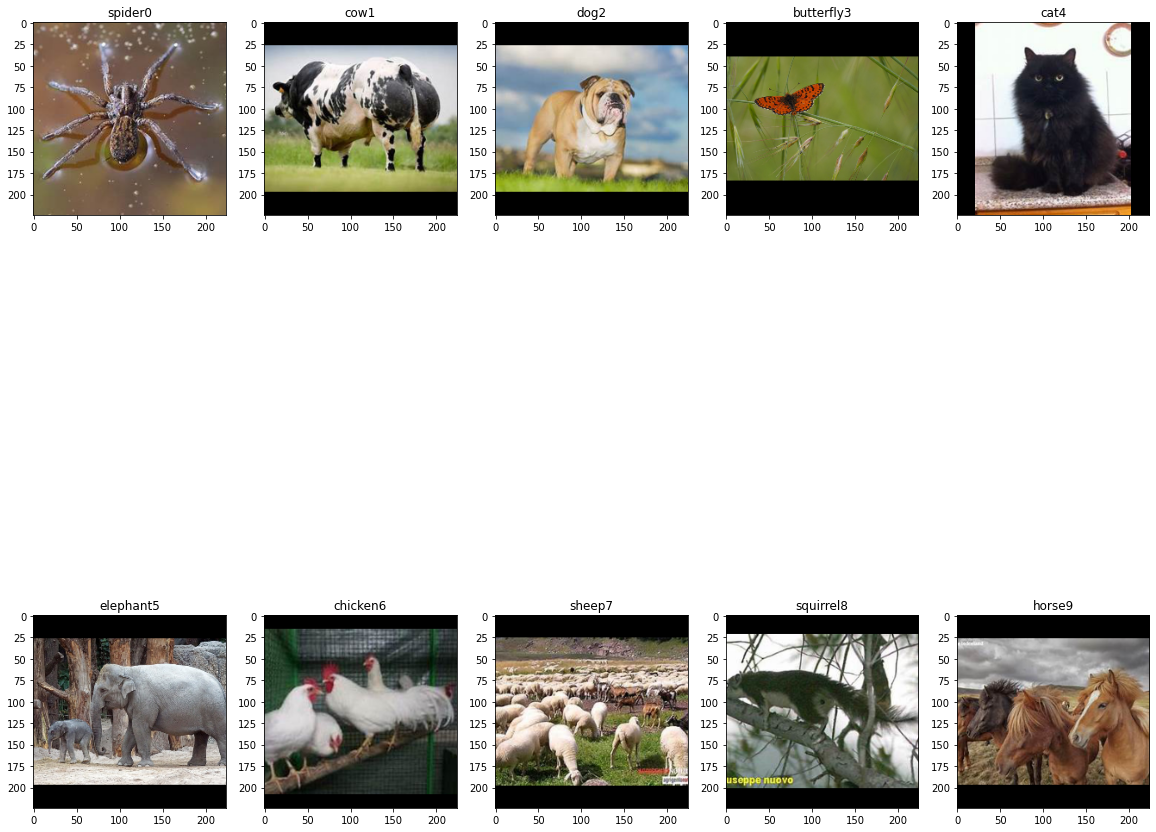

In [5]:
rows,cols = 2,5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20,20))
for i in range(10):
    path = train_df[train_df.category == i].values[2]
    
    axes[i//cols, i%cols].set_title(path[0].split('/')[-2] + str(path[1]))
    axes[i//cols, i%cols].imshow(images[train_df[train_df.filename == path[0]].index[0]])

In [6]:
data_num = len(y)
random_index = np.random.permutation(data_num)       
x_shuffle = []
y_shuffle = []
for i in range(data_num):
    x_shuffle.append(images[random_index[i]])
    y_shuffle.append(y[random_index[i]])
    
x = np.array(x_shuffle)                              
y = np.array(y_shuffle)                              
val_split_num = int(round(0.2*len(y)))               
x_train = x[val_split_num:]                          
y_train = y[val_split_num:]
x_test = x[:val_split_num] 
y_test = y[:val_split_num]

print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)
y_train = to_categorical(y_train)                    
y_test = to_categorical(y_test)                      

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

img_rows, img_cols, img_channel = 224, 224, 3
name_animal = []
for i in range(10):
    path = train_df[train_df.category == i].values[2]
    if path[0].split('/')[-2] == 'squirrel':
        name_animal.append('squirrel')
    elif path[0].split('/')[-2] == 'horse':
        name_animal.append('horse')
    elif path[0].split('/')[-2] == 'butterfly':
        name_animal.append('butterfly')
    elif path[0].split('/')[-2] == 'cow':
        name_animal.append('cow')
    elif path[0].split('/')[-2] == 'cat':
        name_animal.append('cat')
    elif path[0].split('/')[-2] == 'sheep':
        name_animal.append('sheep')
    elif path[0].split('/')[-2] == 'chicken':
        name_animal.append('chicken')
    elif path[0].split('/')[-2] == 'elephant':
        name_animal.append('elephant')
    elif path[0].split('/')[-2] == 'spider':
        name_animal.append('spider')
    elif path[0].split('/')[-2] == 'dog':
        name_animal.append('dog')

x_train (4000, 224, 224, 3)
y_train (4000,)
x_test (1000, 224, 224, 3)
y_test (1000,)


In [7]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(10, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output), name='ani')
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])


model.summary()

Model: "ani"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0       

In [13]:
batch_size = 32                       
epochs = 5                           

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1, 
        horizontal_flip=True)
train_datagen.fit(x_train)


history = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[ModelCheckpoint('animal-recognition-checkpoint', monitor='val_acc')]
)

In [11]:
model.save('animal-recognition.h5')
del model

In [26]:
model = load_model('animal-recognition.h5')

In [29]:
# #save for servnig
MODEL_DIR = './serve/'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))

tensorflow.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

#saved_model_cli show --dir /home/andrii/VSCodeWorkspace/animal-recognition-app/serve/1 --all
#nohup tensorflow_model_server --rest_api_port=8501 --model_name=saved_model --model_base_path="/home/andrii/VSCodeWorkspace/animal-recognition-app/serve/" >server.log 2>&1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./serve/1/assets


Epochs=5, Train accuracy=0.85674, Validation accuracy=0.90469


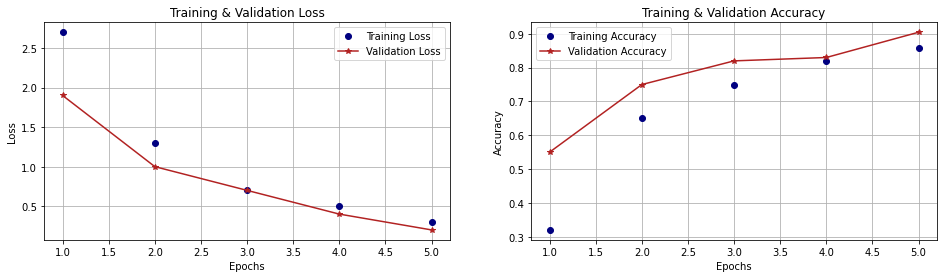

In [24]:
history = history.history

print("Epochs={0:d}, Train accuracy={1:.5f}, Validation accuracy={2:.5f}".format(epochs,history['acc'][epochs-1],history['val_acc'][epochs-1]))
def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['acc'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    acc_vals = history['acc']
    val_acc_vals = history['val_acc']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals
show_plots(history)

['spider', 'cow', 'dog', 'butterfly', 'cat', 'elephant', 'chicken', 'sheep', 'squirrel', 'horse']


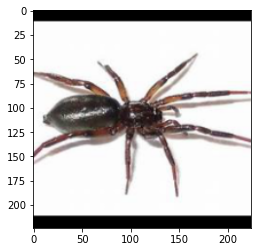

Actual  : spider
Predict : spider  with chance 100.00%


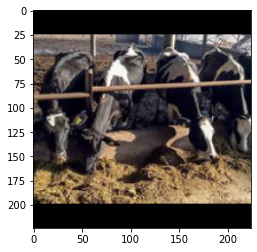

Actual  : cow
Predict : cow  with chance 100.00%


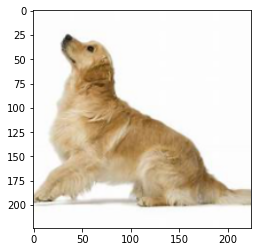

Actual  : dog
Predict : cat  with chance 17.99%
Predict : chicken  with chance 82.01%


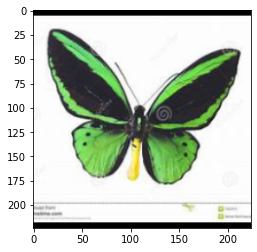

Actual  : butterfly
Predict : butterfly  with chance 100.00%


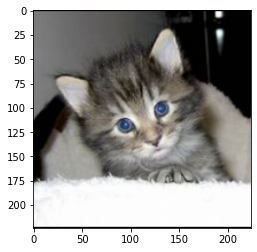

Actual  : cat
Predict : cat  with chance 100.00%


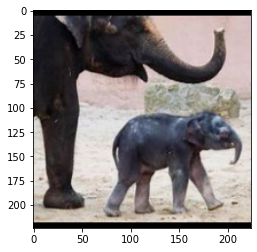

Actual  : elephant
Predict : horse  with chance 100.00%


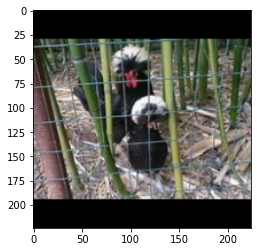

Actual  : chicken
Predict : squirrel  with chance 99.22%


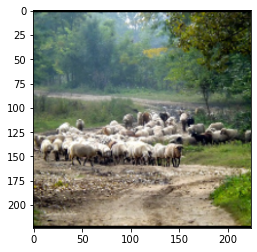

Actual  : sheep
Predict : cow  with chance 100.00%


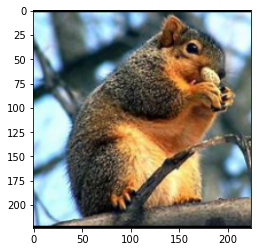

Actual  : squirrel
Predict : chicken  with chance 100.00%


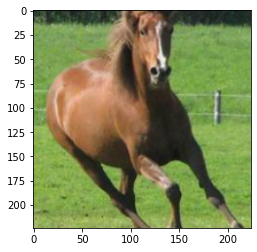

Actual  : horse
Predict : horse  with chance 100.00%


In [27]:
test_images = []


j = 82 
for i in range(10):
    path = train_df[train_df.category == i].values[j]
    a = images[train_df[train_df.filename == path[0]].index[0]]
    img = np.array(a)
    img = img[:, :, ::-1].copy() 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if(img.shape[0] > img.shape[1]):
        tile_size = (int(img.shape[1]*256/img.shape[0]),256)
    else:
        tile_size = (256, int(img.shape[0]*256/img.shape[1]))
    img = centering_image(cv2.resize(img, dsize=tile_size))
    img = img[16:240, 16:240]
    test_images.append(img)

test_images = np.array(test_images).reshape(-1,224,224,3)
something = model.predict(np.array(test_images, dtype='f'))
animals = name_animal
print(animals);
i = 0
for pred in something:
    path = train_df[train_df.category == i].values[2]
    plt.imshow(test_images[i])
    plt.show()
    print('Actual  :', animals[i])
    for num in pred:
        if(num > 0.01):
            print('Predict :', animals[np.where(num == pred)[0][0]],' with chance {0:.2f}%'.format(num * 100))
    i += 1
